# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100007., 100054.,  99966., 100036., 100256., 100198.,  99812.,
         99813.,  99999.,  99859.]),
 array([ 1.00008853, 10.90007516, 20.80006179, 30.70004841, 40.60003504,
        50.50002167, 60.40000829, 70.29999492, 80.19998155, 90.09996817,
        99.9999548 ]),
 <a list of 10 Patch objects>)

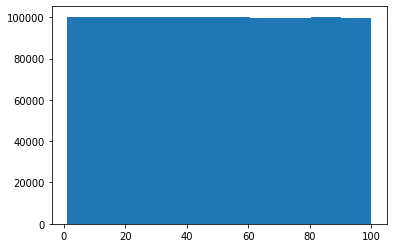

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

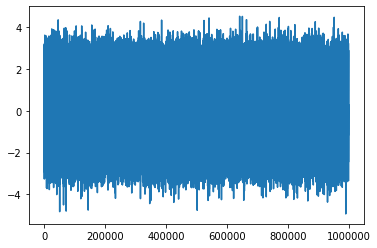

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.60000e+01, 1.13300e+03, 1.68060e+04, 1.07461e+05, 2.95156e+05,
        3.51265e+05, 1.82696e+05, 4.13350e+04, 3.96300e+03, 1.49000e+02]),
 array([-4.9367126 , -3.98949167, -3.04227075, -2.09504982, -1.14782889,
        -0.20060797,  0.74661296,  1.69383388,  2.64105481,  3.58827573,
         4.53549666]),
 <a list of 10 Patch objects>)

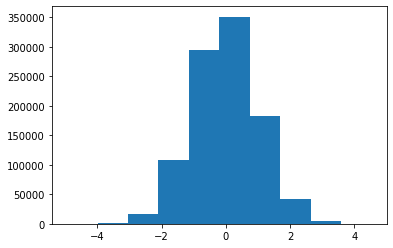

In [6]:
%matplotlib inline
plt.hist(data)

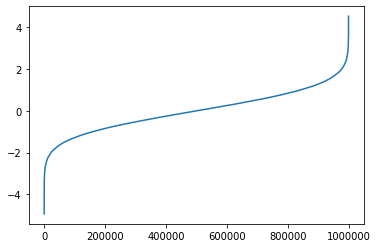

In [7]:
plt.plot(x,sorted(data))

(array([  16.,  117.,  493., 1430., 2533., 2720., 1717.,  743.,  205.,
          26.]),
 array([-3.59138097, -1.82317996, -0.05497895,  1.71322206,  3.48142307,
         5.24962408,  7.01782509,  8.7860261 , 10.55422711, 12.32242812,
        14.09062913]),
 <a list of 10 Patch objects>)

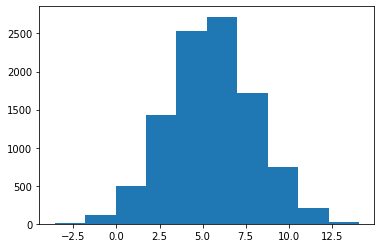

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.75675751,  1.294599  , -0.5179443 , -0.37378204],
       [ 0.9376852 ,  0.97870867, -0.8653174 , -0.43381074]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.140772


(3.140772, [<matplotlib.lines.Line2D at 0x7ff212a0f150>])

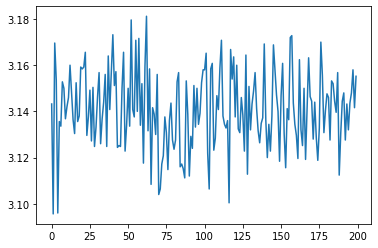

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.001821,1.501446,18.499087
std,0.999194,2.497566,7.796272
min,-4.854757,-10.076717,5.000009
25%,-0.676470,-0.183579,11.737813
50%,-0.001283,1.501092,18.503591
75%,0.672970,3.185337,25.255041
max,4.950306,13.094640,31.999995


(array([4.70000e+01, 1.86400e+03, 2.60000e+04, 1.48190e+05, 3.43230e+05,
        3.29483e+05, 1.29235e+05, 2.04970e+04, 1.42300e+03, 3.10000e+01]),
 array([-4.85475707, -3.87425079, -2.89374451, -1.91323822, -0.93273194,
         0.04777434,  1.02828062,  2.0087869 ,  2.98929318,  3.96979946,
         4.95030574]),
 <a list of 10 Patch objects>)

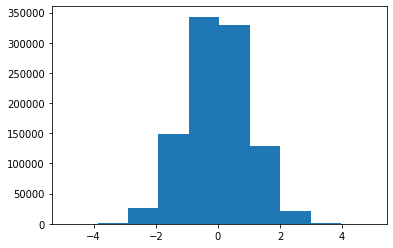

In [14]:
plt.hist(data["A"])

(array([9.90000e+01, 2.57700e+03, 2.93730e+04, 1.45469e+05, 3.23739e+05,
        3.22724e+05, 1.44460e+05, 2.88930e+04, 2.57600e+03, 9.00000e+01]),
 array([-10.07671701,  -7.75958131,  -5.44244562,  -3.12530992,
         -0.80817423,   1.50896146,   3.82609716,   6.14323285,
          8.46036855,  10.77750424,  13.09463994]),
 <a list of 10 Patch objects>)

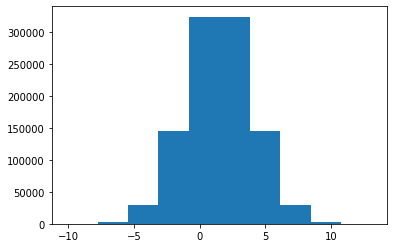

In [15]:
plt.hist(data["B"])

(array([100046., 100354.,  99833.,  99766.,  99865.,  99924.,  99869.,
        100385.,  99994.,  99964.]),
 array([ 5.0000089 ,  7.70000754, 10.40000618, 13.10000482, 15.80000346,
        18.5000021 , 21.20000074, 23.89999938, 26.59999802, 29.29999666,
        31.99999529]),
 <a list of 10 Patch objects>)

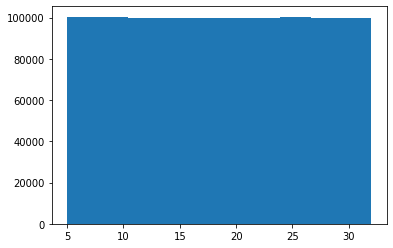

In [16]:
plt.hist(data["C"])

In [18]:
data = pd.read_csv("/Users/josemanuelbustos/Desktop/cursos_udemy/python-ml-course-master/notebooks/datasets/customer-churn-model/Customer Churn Model.txt")

In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [20]:
colum_names = data.columns.values.tolist()

In [21]:
a = len(colum_names)
a

21

In [22]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [23]:
new_data

,Column Name,A,B
42,State,0.552906,0.309646
43,Account Length,-0.027114,0.026293
44,Area Code,0.253396,0.785240
45,Phone,-0.377553,0.459760
46,Int'l Plan,1.207810,0.002146
47,VMail Plan,-1.997232,0.746756
48,VMail Message,0.207648,0.731455
49,Day Mins,1.214114,0.819527
50,Day Calls,-0.685585,0.121099
51,Day Charge,-0.497495,0.529997
